In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
df=pd.read_excel('customer data.xlsx')

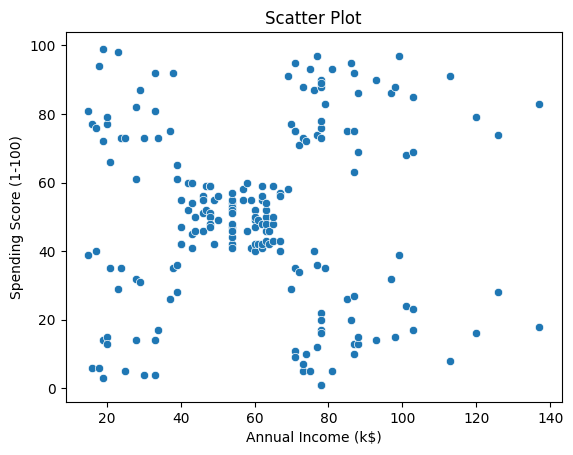

In [32]:
plt.title('Scatter Plot')
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [34]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [35]:
X=df

In [36]:
from sklearn.cluster import KMeans

In [37]:
import warnings
warnings.filterwarnings('ignore')
#sum of variance within cluster
wcss=[]
for i in range(1,31):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

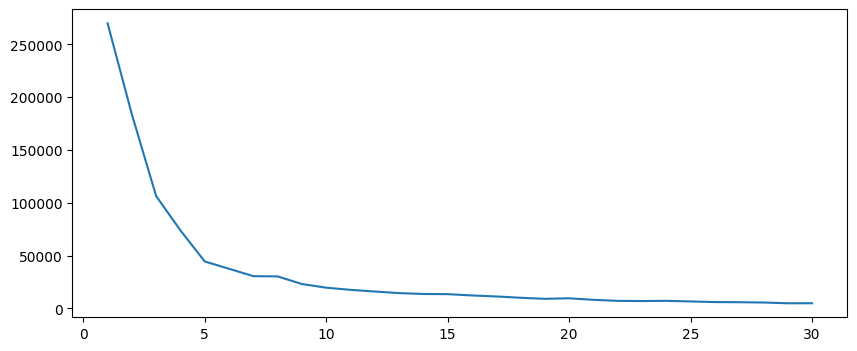

In [38]:
plt.figure(figsize=(10,4))
plt.plot(range(1,31),wcss)
plt.show()

In [39]:
km=KMeans(n_clusters=5)
df['KMeans Prediction']=km.fit_predict(X)

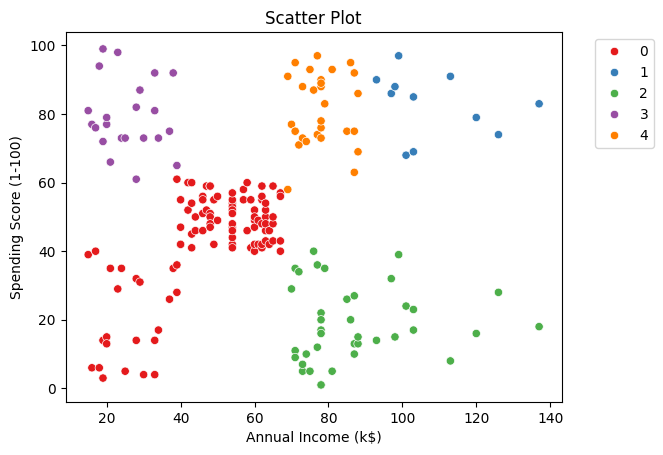

In [40]:
plt.title('Scatter Plot')
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],
                hue=df['KMeans Prediction'],palette='Set1')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [ ]:
df[(df['KMeans Prediction']==4) | (df['KMeans Prediction']==2) ].to_excel('Luxury Products Leads.xslx')

In [42]:
# DBMS

In [43]:
from sklearn.neighbors import NearestNeighbors

In [44]:
ne=NearestNeighbors(n_neighbors=5)
ne_fit=ne.fit(X)
distances,indices=ne_fit.kneighbors(X)

In [45]:
distance=np.sort(distances[:,-1])

In [54]:
distances

array([[ 0.        ,  2.23606798,  7.21110255,  9.8488578 , 12.80624847],
       [ 0.        ,  4.12310563,  5.38516481,  5.38516481,  6.40312424],
       [ 0.        ,  2.        ,  4.24264069,  8.06225775,  8.54400375],
       [ 0.        ,  1.41421356,  4.        ,  4.12310563,  4.47213595],
       [ 0.        ,  2.23606798,  6.40312424,  8.60232527, 12.52996409],
       [ 0.        ,  1.41421356,  3.16227766,  4.24264069,  4.47213595],
       [ 0.        ,  2.        ,  3.16227766,  7.07106781,  7.28010989],
       [ 0.        ,  5.09901951,  6.40312424, 13.03840481, 13.34166406],
       [ 0.        ,  3.16227766,  4.24264069,  6.32455532, 10.04987562],
       [ 0.        ,  4.47213595,  5.09901951,  5.09901951,  5.83095189],
       [ 0.        ,  1.41421356,  1.41421356,  8.06225775,  8.54400375],
       [ 0.        ,  4.12310563,  5.09901951, 15.62049935, 15.65247584],
       [ 0.        ,  1.41421356,  2.        ,  8.06225775,  9.21954446],
       [ 0.        ,  2.        ,  3.1

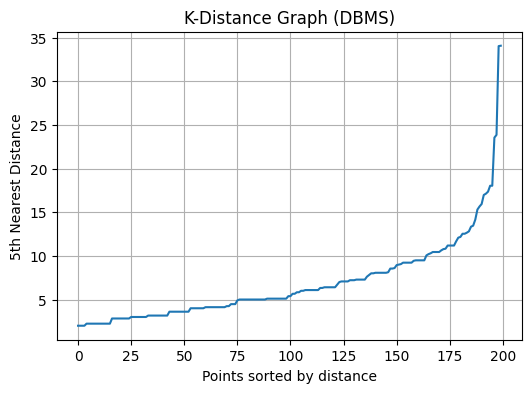

In [46]:
plt.figure(figsize=(6,4))
plt.title('K-Distance Graph (DBMS)')
plt.plot(distance)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Distance')
plt.grid()
plt.show()

In [52]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10)
df['DBSCAN Cluster']=db.fit_predict(X)


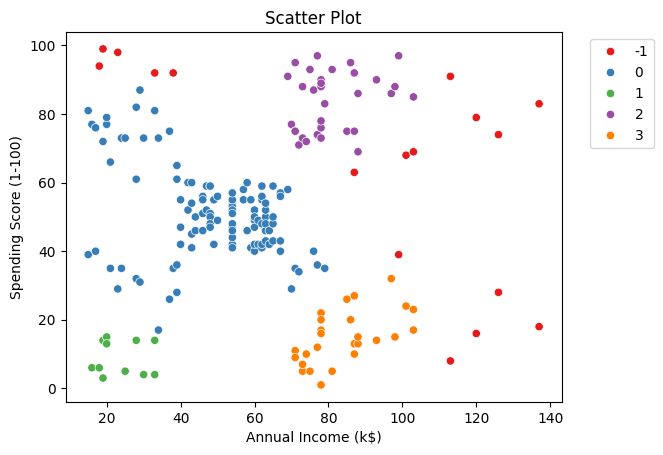

In [53]:
plt.title('Scatter Plot')
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],
                hue=df['DBSCAN Cluster'],palette='Set1')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()